In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

In [2]:
def run_experiment(steps=10000, runs=2000, eps=0.1, alpha=None):
    """
    Runs the 10-armed bandit experiment.
    If alpha is None, use sample-average. 
    Otherwise, use constant step-size alpha.
    """
    all_rewards = np.zeros((runs, steps))
    optimal_action_counts = np.zeros((runs, steps))

    for r in range(runs):
        # Initialize true values q*(a) as equal (0)
        q_true = np.zeros(10)
        # Estimates Q(a)
        Q_estimates = np.zeros(10)
        # Count of actions taken (for sample-average)
        action_counts = np.zeros(10)

        for s in range(steps):
            # 1. Choose action (epsilon-greedy)
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                # Break ties randomly
                action = np.random.choice(np.where(Q_estimates == np.max(Q_estimates))[0])

            # 2. Record if it was the optimal action
            if action == np.argmax(q_true):
                optimal_action_counts[r, s] = 1

            # 3. Generate reward
            reward = np.random.normal(q_true[action], 1.0)
            all_rewards[r, s] = reward

            # 4. Update Q-estimates
            action_counts[action] += 1
            if alpha is None:
                # Sample Average update: Q = Q + 1/n * (R - Q)
                step_size = 1.0 / action_counts[action]
            else:
                # Constant step-size update
                step_size = alpha
            
            Q_estimates[action] += step_size * (reward - Q_estimates[action])

            # 5. Nonstationary Step: q*(a) takes a random walk
            q_true += np.random.normal(0, 0.01, size=10)

    return all_rewards.mean(axis=0), optimal_action_counts.mean(axis=0)

Running Sample-Average method...
Running Constant Step-Size method (alpha=0.1)...


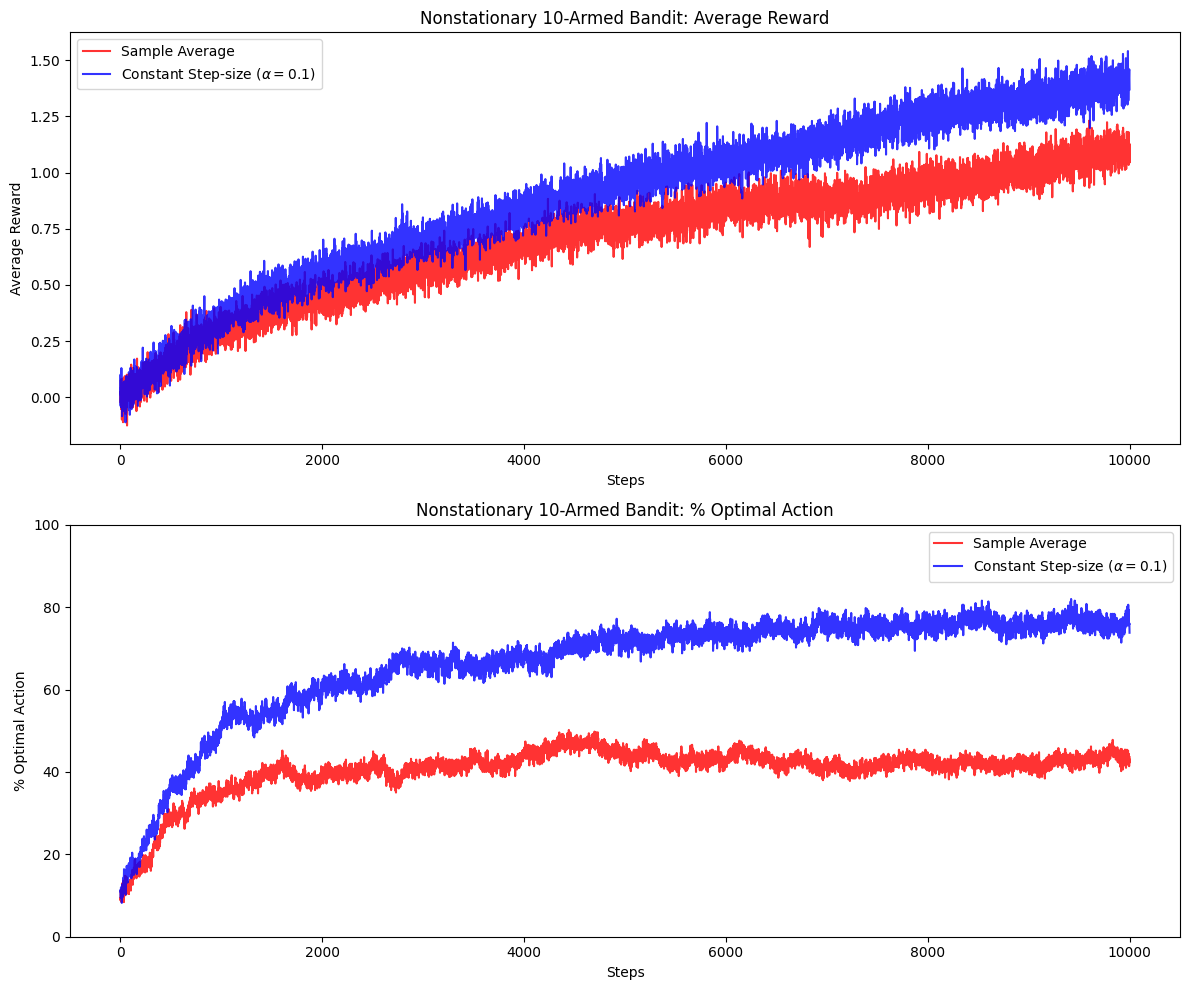

In [3]:
# --- Execution ---
steps = 10000
runs = 500  # Reduced runs for speed; use 2000 for smoother curves like the book

print("Running Sample-Average method...")
avg_rew_sa, opt_act_sa = run_experiment(steps=steps, runs=runs, eps=0.1, alpha=None)

print("Running Constant Step-Size method (alpha=0.1)...")
avg_rew_alpha, opt_act_alpha = run_experiment(steps=steps, runs=runs, eps=0.1, alpha=0.1)

# --- Plotting ---
plt.figure(figsize=(12, 10))

# Reward Plot
plt.subplot(2, 1, 1)
plt.plot(avg_rew_sa, label='Sample Average', color='red', alpha=0.8)
plt.plot(avg_rew_alpha, label='Constant Step-size ($\\alpha=0.1$)', color='blue', alpha=0.8)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Nonstationary 10-Armed Bandit: Average Reward')
plt.legend()

# Optimal Action Plot
plt.subplot(2, 1, 2)
plt.plot(opt_act_sa * 100, label='Sample Average', color='red', alpha=0.8)
plt.plot(opt_act_alpha * 100, label='Constant Step-size ($\\alpha=0.1$)', color='blue', alpha=0.8)
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Nonstationary 10-Armed Bandit: % Optimal Action')
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()